# Lab 2 - Clustering
In this lab we look at clustering with k-means and GMMs. We will work on putting together the skeleton code to create the functionality of the algorithms, and then we will cluster the Fisher Iris dataset. We will finish by looking at the sklearn implementations of these algorithms.

<b>Important note:</b> 
    Please do not edit the existing code snippets. Instead, add your functionality into the TODO sections. Read the entire skeleton structure first and think about how you should structure the code you are adding in carefully.
    
There are <b>42</b> TODOs in this lab. It may seem like a lot but don't worry. Many are just selecting hyper-parameters and many of the visualisation TODOs are the same.

## Task 2.1 - Data Exploration
This task will load the data and explore the feature space of the observations. We will plot two feature dimensions against eachother, labeling them based on colour from the known class IDs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

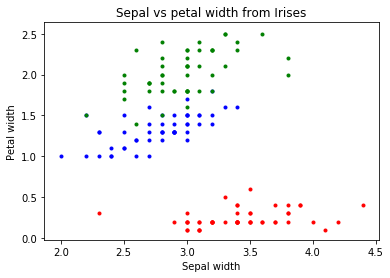

In [3]:
irisData = np.load('Iris_data.npy')
irisLabels = np.load('Iris_labels.npy')
counter = 0
for i in irisLabels:
    if i == 0:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='red', marker='.')
    elif i == 1:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='blue', marker='.')
    else:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='green', marker='.')
    counter += 1

plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.title('Sepal vs petal width from Irises')

plt.show()

## Task 2.2 - K-means Clustering 
The task here is to fill out the skeleton code in order to complete the k-means implementation. Follow the lecture notes and take some hints along the way. We first define a function to calculate the Euclidean distance between each of the cluster centres and the data, then we initialise our hyper-parameters and create a loop to fit our clusters to the data.

### K-Means algorithm:

Setup: Select random initial set of k cluster centers

Loop:

    for i = 1 to maximum number of iterations
        calculate distance from training points to cluster centroids
        update class labels
        recalculate centroid locations

In [4]:
# Definition of euclidean distance function between cluster centroid and matrix of datapoints
def euclidean_distance(k_centroids, datapoints):
    dists = np.zeros(shape=[datapoints.shape[0], k_centroids.shape[0]])
    
    for iK in range(0, k_centroids.shape[0]):
        centre = np.tile(k_centroids[iK, :], (datapoints.shape[0], 1))
        diff = centre - datapoints
        sum_of_squared_differences = np.zeros([datapoints.shape[0]])
        for i_dimension in range(0, k_centroids.shape[1]):
            sum_of_squared_differences += (diff[:, i_dimension]**2)
        dists[:,iK] = np.sqrt(sum_of_squared_differences)
        
    return dists

Iteration 1: total update distance of centroids: 8.568888888888885
Iteration 2: total update distance of centroids: 4.889542483660131
Iteration 3: total update distance of centroids: 1.0175401069518721
Iteration 4: total update distance of centroids: 0.2251419073049094
Iteration 5: total update distance of centroids: 0.0
Iteration 6: total update distance of centroids: 0.0
Iteration 7: total update distance of centroids: 0.0
Iteration 8: total update distance of centroids: 0.0
Iteration 9: total update distance of centroids: 0.0
Iteration 10: total update distance of centroids: 0.0
Iteration 11: total update distance of centroids: 0.0
Iteration 12: total update distance of centroids: 0.0


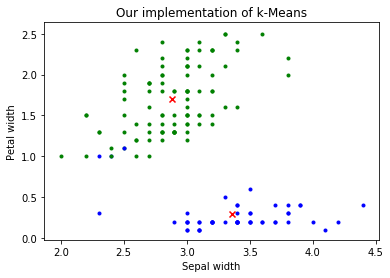

In [5]:
k = 2 # Select a number of clusters.
n_iteration = 12 # Select a number of iterations.
k_centroid = np.array([irisData[0, :], irisData[1, :]])#, irisData[2, :]]) # Select cluster centroids.

for n in range(0, n_iteration, 1): # Loop over each iteration.
    last_k_centroid = k_centroid
    
    #Calculate distances
    dists = euclidean_distance(k_centroid, irisData)
    
    #Reassign labels
    predicted_label = np.apply_along_axis(np.argmin, axis=1, arr=dists)
    
    #Recalculate centroids
    new_centroid = np.zeros(shape=[k,irisData.shape[1]])
    for iK in range(0, k, 1): # TODO: Loop over each cluster iK.
        #Get all datapoints alocated to cluster iK
        cluster_data = irisData[(iK==predicted_label[:])] # Slice into data with predicted_label.
        #Calculate the mean of this cluster
        new_centroid[iK, :] = cluster_data.mean(axis=0)# Calculate mean of datapoints.
        
    #Assign the new cluster centers
    k_centroid = new_centroid
        
    print('Iteration {0}: total update distance of centroids: {1}'.format(n+1, np.sum(np.abs(new_centroid - last_k_centroid))))
    
#Visualisation of model predictions
counter=0
i=0
for i in predicted_label:
    if i == 0:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='green', marker='.')
    else:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='blue', marker='.')
    counter += 1
plt.scatter(k_centroid[:,1], k_centroid[:,3], color='red', marker='x')

plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.title('Our implementation of k-Means')
plt.show()

## Task 2.3 - Gaussian Mixture Models
The task here is to fill out the skeleton code in order to complete the GMM implementation. Follow the lecture notes and take some hints along the way. We first define some functions for the algorithm, followed by initialisation of the parameters, and finally we implement the loop within which we fit our Gaussians to our data.

### GMM Algorithm:
Setup: Initialise Gaussian distribution centroid, standard deviations and mixing coefficients using k-means coefficients.

Loop: 

    Compute E-Step: calculate posteriors for the data given current Gaussian parameters 
    Compute M-Step: update model parameters 

In [6]:
# TODO: Figure out which one is the E-Step and which is the M-Step.

def multivariate_gaussian_density(x, mu, sig):
    size = x.shape[0]
    det = np.linalg.det(sig)
    norm_const = 1.0 / ((2*np.pi)**(size/2) * det **(1.0/2) )
    x_mu = x - mu
    inv = np.linalg.inv(sig)  
    result = np.e**(-(1.0/2) * (x_mu @ inv @ x_mu.T))
    
    return norm_const * result
    
#E-Step    
def likelihood(x,gCentroids, gSD, gMix):
    p = np.zeros([x.shape[0],gCentroids.shape[0]])
    p_total = np.zeros(x.shape[0])
    posteriors = np.zeros([x.shape[0],gCentroids.shape[0]])
    
    for iSample in range(0, x.shape[0]):
        for iCluster in range(0, gCentroids.shape[0]):
            p[iSample,iCluster] = multivariate_gaussian_density(x[iSample,:].T, gCentroids[iCluster,:], gSD[:,:,iCluster])
            p_total[iSample] = p_total[iSample] + p[iSample,iCluster] 
        
        for iCluster in range(0, gCentroids.shape[0]):
            posteriors[iSample, iCluster] = p[iSample, iCluster] / p_total[iSample]
            
    return posteriors    

#M-Step
def update_params(data, posteriors, gMix, gSD, gCentroids):
    #Update mixing coefs
    newGMix = 1/data.size*sum(posteriors)
    
    
    #Update centroids
    newCentroids = np.zeros(gCentroids.shape)
    for iCluster in range(0, gMix.shape[0]):
        norm = np.expand_dims(posteriors[:, iCluster],axis=1)/np.sum(posteriors[:,iCluster])
        newCentroids[iCluster, :] = np.sum(norm * data, axis=0)

    #Update covariance matrices
    newGSD = np.zeros(gSD.shape)
    for c in range(0, gMix.shape[0]):
        running_sum = np.zeros(gSD.shape[0:2]) 
        for iData in range(0, data.shape[0]):
            mean_centred_data = (np.expand_dims(data[iData, :],axis=0) - newCentroids[c,:])
            running_sum += posteriors[iData, iCluster] * mean_centred_data * mean_centred_data.T
        running_sum = running_sum / np.sum(posteriors[:,iCluster],axis=0)
        newGSD[:,:,c] = running_sum

    return newGMix, newGSD, newCentroids

### Initialise parameters
Initialise the number of components, the number of iterations and the Gaussian parameters (mus, sigmas, mixings).

In [7]:
g = 2 # Select a number of Gaussians. Use the same number as k in task 2.2.
nIteration = 12 # Select a number of iterations.

cluster_centroids = np.zeros([g,irisData.shape[1]])
g_SD = np.zeros([irisData.shape[1],irisData.shape[1], g])
g_mix = np.zeros(g)

# TODO: Understand what is happening here. Hint: clustering part 2 lecture, slide 10.
for iCluster in range(0,g):
    data_in_cluster = irisData[predicted_label == iCluster, :]
    cluster_centroids[iCluster,:] = np.mean(data_in_cluster, axis=0)
    g_SD[:,:,iCluster] = np.cov(data_in_cluster.T)
    g_mix[iCluster] = data_in_cluster.shape[0] / irisData.shape[0]

### Main loop of GMM fitting
Loop over our iterations, computing steps E and M repeatedly.

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12


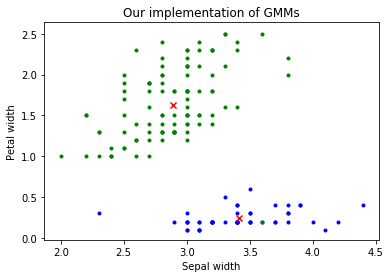

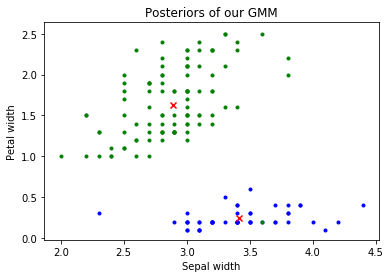

In [8]:
for i in range(0, nIteration):
    #E-Step
    posteriors = likelihood(irisData, cluster_centroids, g_SD, g_mix) # Call E-Step function.

    #M-Step
    g_mix, g_SD, cluster_centroids = update_params(irisData, posteriors, g_mix, g_SD, cluster_centroids) # Call M-Step function.
    
    print('Iteration {0}'.format(i+1))#, end='\r') 

#Predict labels
predicted_label = np.apply_along_axis(np.argmin, axis=1, arr=posteriors) # Get cluster label based on posterior. Hint: argmin.

#Visualisation of model predictions
counter=0
i=0
for i in predicted_label:
    if i == 0:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='blue', marker='.')
    else:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='green', marker='.')
    counter += 1
plt.scatter(cluster_centroids[:,1], cluster_centroids[:,3], color='red', marker='x')

plt.xlabel('Sepal width')
plt.ylabel('Petal width')

plt.title('Our implementation of GMMs')
plt.show()  

#Visualisation of model posteriors
# TODO: Create a new figure with plt.figure()
# TODO: Plot two feature dimensions against eachother, label with the posteriors for a specific cluster.
# TODO: Plot the cluster centroids on top. Hint: use a different shaped marker with 'marker="x"'.
# TODO: Label axes correctly.
plt.figure()
counter=0
i=0
for i in predicted_label:
    if i == 0:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='blue', marker='.')
    else:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='green', marker='.')
    counter += 1
plt.scatter(cluster_centroids[:,1], cluster_centroids[:,3], color='red', marker='x')

plt.xlabel('Sepal width')
plt.ylabel('Petal width')

plt.title('Posteriors of our GMM')
plt.show()

# Using SciKit-Learn
Here we will import SciKit-Learn and use the built-in API functionality to run k-Means clustering and GMM on the Fisher Iris data.

Here we can use the <b>sklearn.cluster.KMeans</b> object. We need to define a number of clusters and then call the <b>fit</b> and <b>predict</b> methods.

We can also use the <b>sklearn.mixture.GaussianMixture</b> object. We need to define a number of Guassians and then call the <b>fit</b> and <b>predict</b> methods.

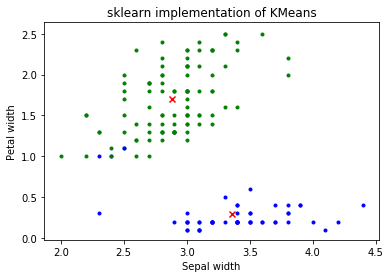

AttributeError: module 'sklearn.mixture' has no attribute 'GMM'

In [9]:
import sklearn.cluster
import sklearn.mixture

sklKMeans = sklearn.cluster.KMeans(n_clusters=2)
sklKMeans.fit(irisData)
predicted_label = sklKMeans.predict(irisData)
cluster_centroids = sklKMeans.cluster_centers_

counter=0
i=0
for i in predicted_label:
    if i == 0:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='green', marker='.')
    else:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='blue', marker='.')
    counter += 1
plt.scatter(cluster_centroids[:,1], cluster_centroids[:,3], color='red', marker='x')

plt.xlabel('Sepal width')
plt.ylabel('Petal width')

plt.title('sklearn implementation of KMeans')
plt.show() 


sklGMM = sklearn.mixture.GMM(n_components=2)
sklGMM.fit(irisData)
predicted_label = sklGMM.predict(irisData)
cluster_centroids = sklGMM.means_

counter=0
i=0
for i in predicted_label:
    if i == 0:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='green', marker='.')
    else:
        plt.scatter(irisData[counter,1], irisData[counter,3], color='blue', marker='.')
    counter += 1
plt.scatter(cluster_centroids[:,1], cluster_centroids[:,3], color='red', marker='x')

plt.xlabel('Sepal width')
plt.ylabel('Petal width')

plt.title('sklearn implementation of GMMs')
plt.show() 